# PCA by hand (with a computer)
Okay this goes through the complete steps one needs to take to do PCA by hand, building off of the Iris data example in the week 5 notebook. We will repeat the earlier steps there and then continue on to projecting our examples into this new PCA space and visualizing the 2D example projected into a single dimension


In [1]:
import sklearn
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]

# Take a look at df_iris
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


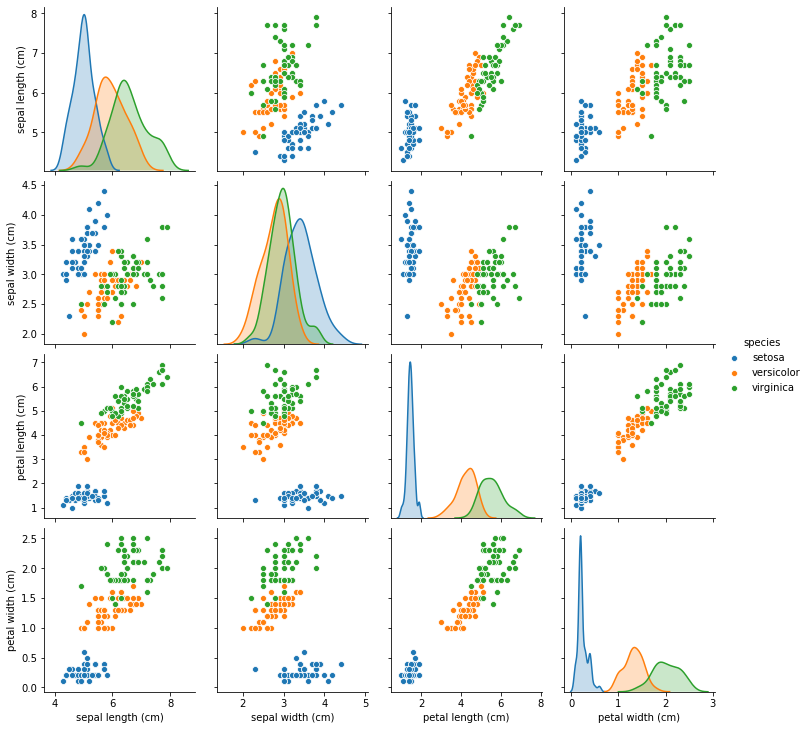

In [2]:
sns.pairplot(df_iris, hue='species')

In [3]:
# Substract the mean from the measurements.
df_centered = df_iris.loc[:, ['petal length (cm)', 'petal width (cm)']]
for col in df_centered.columns:
    df_centered[col] -= df_centered[col].mean()

In [4]:
cov_mat = np.cov(df_centered.transpose())
print('Covariance matrix \n', cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors\n', eig_vecs)
print('\nEigenvalues\n', eig_vals)

Covariance matrix 
 [[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]
Eigenvectors
 [[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]

Eigenvalues
 [3.66123805 0.03604607]


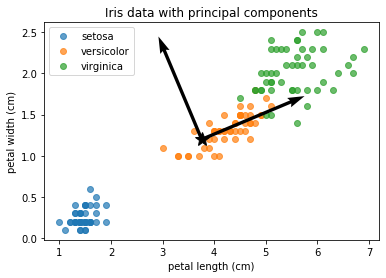

In [5]:
# Plot Petal length vs petal width only
for key, group in df_iris.groupby(['species']):
    plt.plot(group['petal length (cm)'], group['petal width (cm)'],
               label=key, marker='o', linestyle='none', alpha=0.7)
    
m = [df_iris['petal length (cm)'].mean(), df_iris['petal width (cm)'].mean()]
# Add the mean value to the plot
plt.plot(m[0], m[1], marker='*', color='black', markersize=15)

# Add arrows showing the eigenvectors
plt.quiver([m[0]]*2, [m[1]]*2, eig_vecs[:,1], eig_vecs[:,0], zorder=11, 
           width=0.01, scale=3)
    
# Tidy up plot
plt.legend()
#plt.margins(0.02)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris data with principal components');

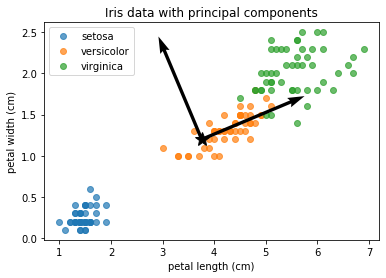

In [6]:
# Plot Petal length vs petal width only
for key, group in df_iris.groupby(['species']):
    plt.plot(group['petal length (cm)'], group['petal width (cm)'],
               label=key, marker='o', linestyle='none', alpha=0.7)

# Add the mean value to the plot
plt.plot(m[0], m[1], marker='*', color='black', markersize=15)

# Add arrows showing the eigenvectors
plt.quiver([m[0]]*2, [m[1]]*2, eig_vecs[:,1], eig_vecs[:,0], zorder=11, 
           width=0.01, scale=3)
    
# Tidy up plot
plt.legend()
#plt.margins(0.02)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris data with principal components');

**Okay this is where the new material from the week5 notebook picks up**

If we want to reduce our data to $k$ dimensions, we will only keep the top $k$ eigenvectors (ranked by eigenvalue magnitude). 

To project our data into this new dimension, we have to multiply our data by the so-called projection matrix, which is created by concatenating the top $k$ eigenvectors together. Then, the dot product of the data with the projection matrix "projects" the data onto our new axis.

Since in this simple example we are projecting into a 1D space, we just have to matrix multiply our data by the eigenvector with the largest corresponding eigenvalue.

In [9]:
# Project data to our 1D space
df_1D = pd.DataFrame(np.dot(df_iris.loc[:,['petal length (cm)',
                                           'petal width (cm)']], eig_vecs[:,0]),
                     columns=['projection'])

# Add back the species column
df_1D['species'] = df_iris['species']
df_1D.head()

,projection,species
0,1.368033,setosa
1,1.368033,setosa
2,1.275855,setosa
3,1.460210,setosa
4,1.368033,setosa


Now we can plot our data in 1D only while maintaining ≈98% percent of the variability in the data!

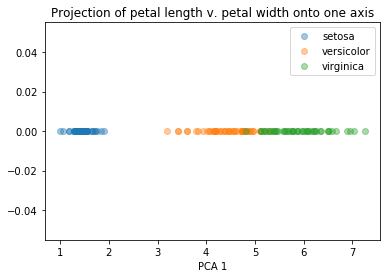

In [10]:
for key, group in df_1D.groupby(['species']):
    plt.plot(group['projection'], np.zeros_like(group['projection']), alpha=0.4, 
             label=key, marker='o', linestyle='none')

plt.margins(0.05)
plt.xlabel('PCA 1')
plt.legend(np.array(['setosa', 'versicolor','virginica']))
plt.title('Projection of petal length v. petal width onto one axis');

So this is cool. We have projected 2-D data down onto a 1-D axis, and still have a sense of how these various iris species differ. Note that while the new dimension has numerical values, its interpretation is a bit fuzzy. It's in fact a weighted combination of *petal length* and *petal width*.